In [2]:
%load_ext autoreload
%autoreload 2

In [37]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [38]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [39]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

# Dataset 1

In [40]:
source, target = create_gaussians(100, 100, var_source=0.2, var_target=0.2)

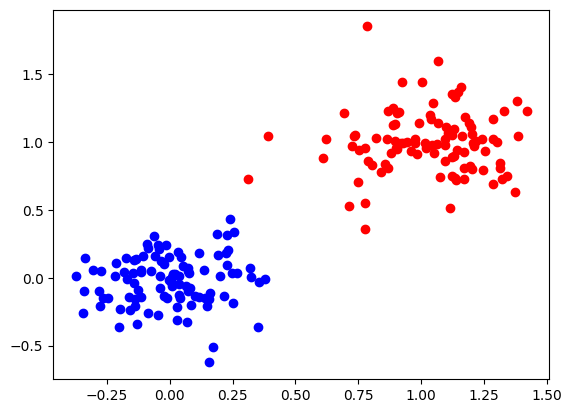

In [41]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [42]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

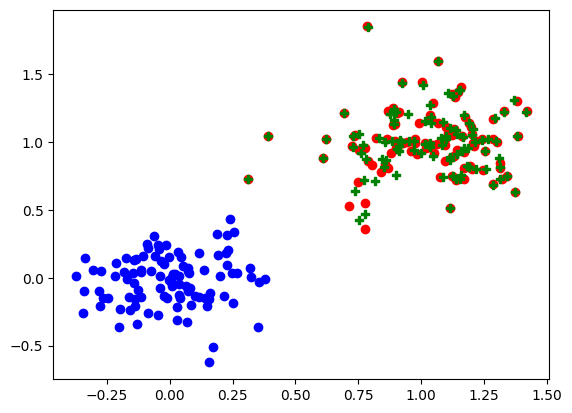

In [43]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green", marker="P")

In [46]:
hessian_source = dot.get_hessians_f(source)

In [35]:
traces = jnp.ones((100,)) - jnp.trace(hessian_source, axis1=1, axis2=2) # because we want the covariance of the brenier potentials, i.e. 0.5* x^2 - f 

In [47]:
erroneous = np.asarray(traces < 0)
print(jnp.sum(erroneous))

35


In [48]:
traces2 = jnp.log(traces-jnp.min(traces)+1)

Text(0.5, 1.0, 'Variances')

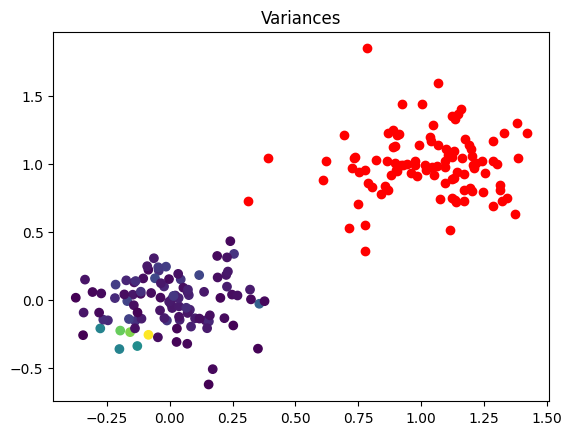

In [49]:
plt.scatter(source[:,0], source[:,1], c=traces)
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.title("Variances")

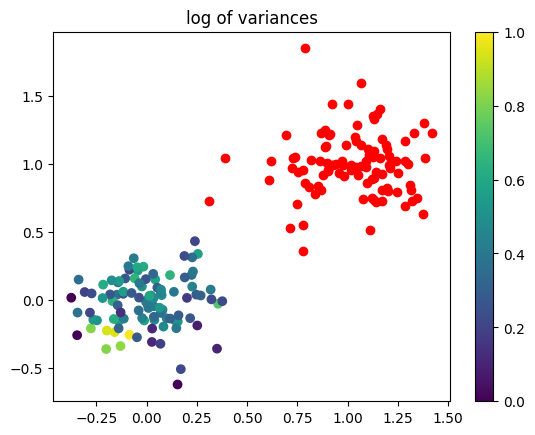

In [50]:
plt.scatter(source[:,0], source[:,1], c=traces2)
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.title("log of variances")
plt.colorbar()

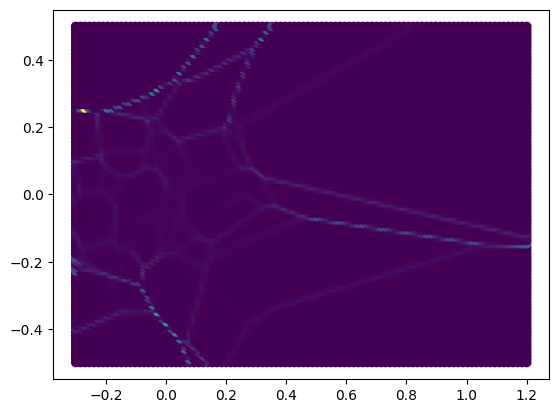

In [52]:
hessian_f = dot.get_hessians_f(concat)

traces = jnp.ones((len(hessian_f),)) - jnp.trace(hessian_f, axis1=1, axis2=2)
erroneous = np.asarray(traces < 0)#.astype(float)

plt.scatter(concat[:,0], concat[:,1], c=traces)

# Dataset 2

In [53]:
source, target = create_gaussian_split(100, 90, var_source=0.1, var_target=0.1, seed=1)

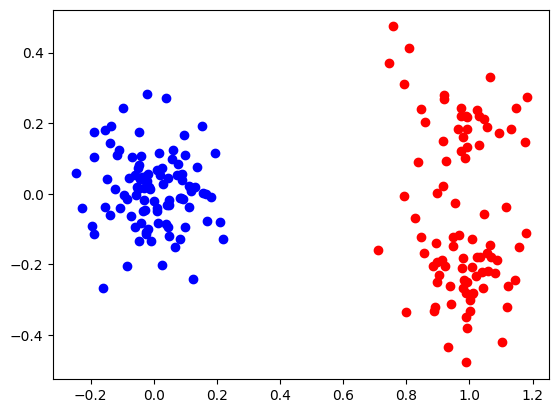

In [54]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [55]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

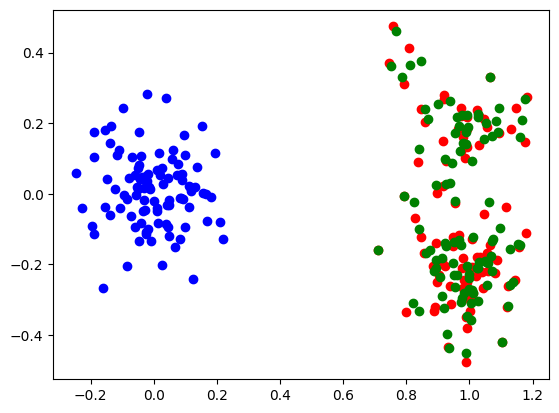

In [56]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green")

In [57]:
hessian_source = dot.get_hessians_f(source)
hessian_target = dot.get_hessians_g(target)

In [58]:
traces_source = jnp.ones((len(hessian_source,))) - jnp.trace(hessian_source, axis1=1, axis2=2)
traces2_source = jnp.log(traces_source-jnp.min(traces_source)+1)

traces_target = jnp.ones((len(hessian_target,))) - jnp.trace(hessian_target, axis1=1, axis2=2)
traces2_target = jnp.log(traces_target-jnp.min(traces_target)+1)


Text(0.5, 1.0, 'variances')

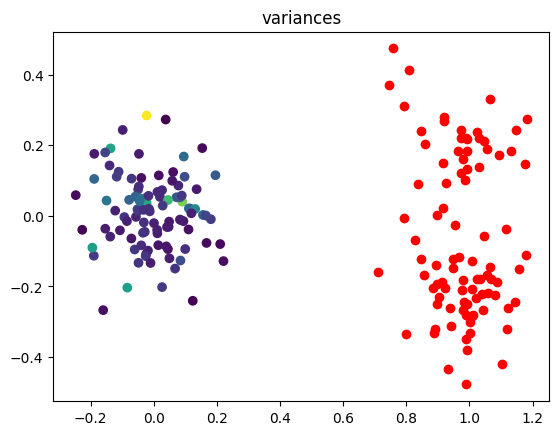

In [59]:
plt.scatter(source[:,0], source[:,1], c=traces_source)
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.title("variances")

Text(0.5, 1.0, 'variances')

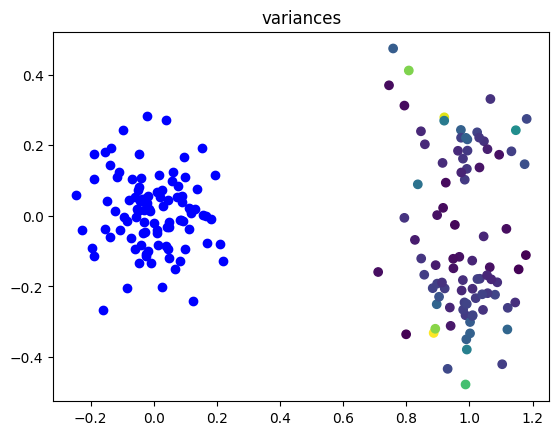

In [60]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], c=traces_target)
plt.title("variances")

Text(0.5, 1.0, 'log of variances')

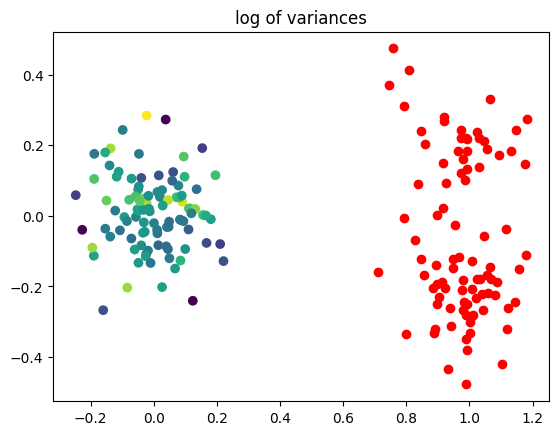

In [62]:
plt.scatter(source[:,0], source[:,1], c=traces2_source)
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.title("log of variances")

Text(0.5, 1.0, 'log of variances')

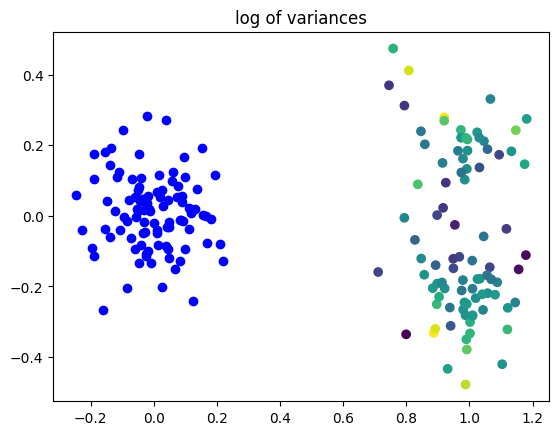

In [64]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], c=traces2_target)
plt.title("log of variances")

In [65]:
hessian_f = dot.get_hessians_f(concat)

In [69]:
traces = jnp.ones(len(hessian_f),) - jnp.trace(hessian_f, axis1=1, axis2=2)
erroneous = np.asarray(traces < 0)#.astype(float)
print(len(erroneous))

10000


In [70]:
traces.max(), traces.min()

(Array(117.149155, dtype=float32), Array(-3.000924, dtype=float32))

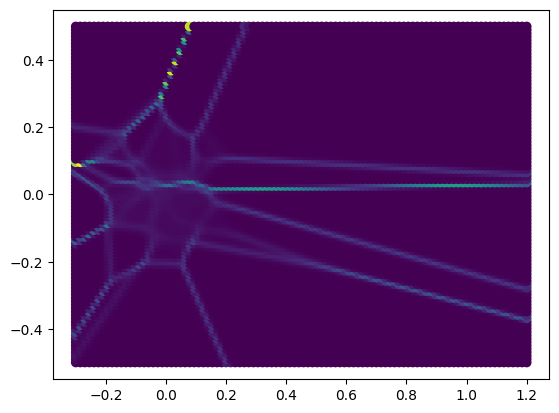

In [71]:
plt.scatter(concat[:,0], concat[:,1], c=traces)
